## Observations and Insights 

In [1]:
# Final Analysis/Inferences:

# Based on the final tumor volumes from the four regimens that were four of the most promising, it looks as
# as though Ramicane had a slight edge over Capomulin as being the most successful over at reducing
# tumor size.

# Interestingly, when picking the mouse x401, it appears that while the tumor size shrank overall,
# it also seems like the tumor grew a bit larger at the final timepoint of the treatment.

# There also appears to be a direct correlation between tumor volume and weight; as the weight of the 
# mice increased, the overall tumor volume also increased as a whole. 

# It would've been most interesting to see the relationship between females and males, and if there's any
# relation between sex of the mice and rate of tumor shrinking amongst the popular drug regimens.

# On that same note, it would've been an even greater asset to have had an even amount of females vs males.

# In regards to final tumor volumes of the four popular regimens, it appears as though none of the treatments
# had any outliers, as evidenced by the boxplot below. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = mouse_metadata.merge(study_results)
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
number_mice = (combined_df.drop_duplicates(subset='Mouse ID'))
print(f'Number of Mice: {len(number_mice)}')

Number of Mice: 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
new_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
new_df.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [12]:
new_df.to_csv('updated_df.csv')
# Optional: Get all the data for the duplicate mouse ID. 
# Didn't quite to this part of the assignment or rather, wasn't able to figure out how to pull the duplicate data.

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Checking the different data types here for use later on
new_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [7]:
# Checking the number of mice in the clean DataFrame.
# Note: The number of mice listed here matches the instructions in the readme.md file
new_number = (new_df.drop_duplicates(subset='Mouse ID'))
print(f'Number of Mice: {len(new_number)}')

Number of Mice: 249


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using groupby to take each drug regiment and agg to run the np functions on the data set with one line of programming. 
# Then renaming the columns simply for aesthetics.
newnew = new_df[['Drug Regimen', 'Tumor Volume (mm3)']]
grouped = newnew.groupby(newnew['Drug Regimen']).agg({'Tumor Volume (mm3)': [np.mean, np.median, np.var, np.std, st.sem]})
grouped = grouped.rename(columns={'mean':'Mean','median':'Median','var':'Variance','std':'Std Deviation','sem':'SEM'})
grouped.to_excel('grouped_table.xlsx')

In [11]:
grouped

Tumor Volume (mm3)                                              
                           Mean     Median   Variance Std Deviation       SEM
Drug Regimen                                                                 
Capomulin             40.675741  41.557809  24.947764      4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177      6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684      6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577      8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479      8.134708  0.596466
Placebo               54.033581  52.288934  61.168083      7.821003  0.581331
Propriva              52.458254  50.854632  44.053659      6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704      4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562      7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355      6.966589  0.516398

## Bar and Pie Charts

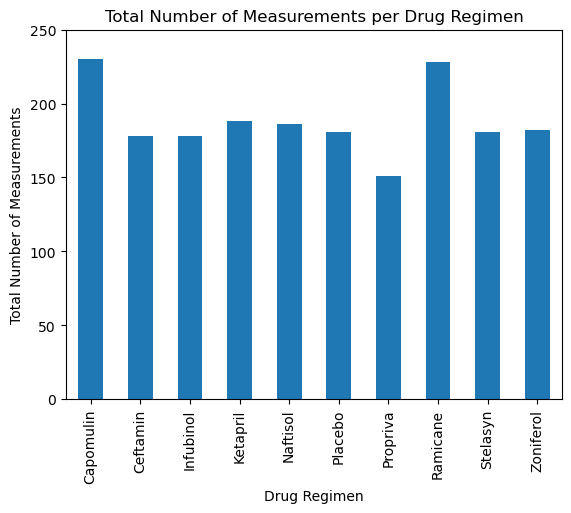

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Grouping by drug regimen and then doing a simple count of the number of measurements.
# Below is the pandas bar graph
doing_bar_graph = new_df.groupby('Drug Regimen')
totalnumber = doing_bar_graph['Drug Regimen'].count()
count_count = totalnumber.plot(kind='bar', ylim = (0,250))
count_count.set_xlabel('Drug Regimen')
count_count.set_ylabel('Total Number of Measurements')
count_count.set_title('Total Number of Measurements per Drug Regimen')
plt.show()

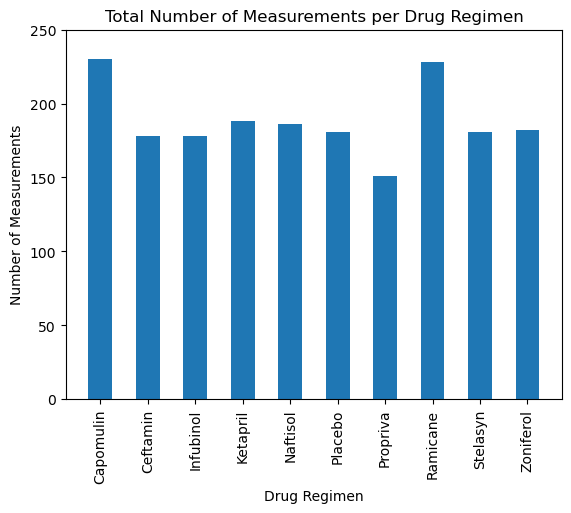

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# First moving the names of the drug regimen from the index back to a column, then using plt to produce the same bar plot. 
bars = grouped.reset_index()
x_axis = bars['Drug Regimen']
plt.xticks(rotation=90) 
plt.ylim(0,250)
plt.title('Total Number of Measurements per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.bar(x_axis,totalnumber, align='center', width=0.5)
plt.show()

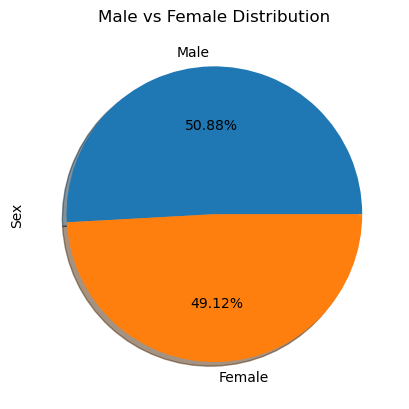

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Getting our labels first, then doing value_counts for our total number. Df.plot used afterwards.
labels_gender = ['Male', 'Female']
pie_data = new_df['Sex'].value_counts()
pie_data.plot(kind='pie', labels=labels_gender, autopct='%1.2f%%', title='Male vs Female Distribution', shadow=True)
plt.show()

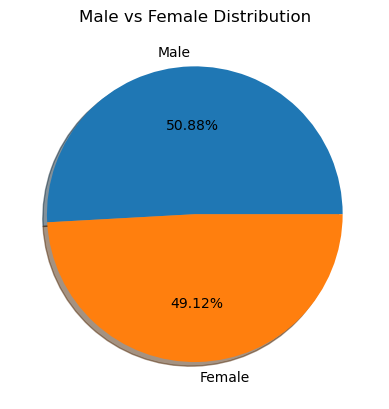

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Again using that value_count before and using .plt to make the pie chart.
plt.pie(pie_data, labels=labels_gender, autopct='%1.2f%%', shadow=True)
plt.title('Male vs Female Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#Below is to verify that the max timepoint is 45
end = new_df['Timepoint'].max()
# Start by getting the last (greatest) timepoint for each mouse
final_tumor = new_df.loc[new_df['Timepoint'] == end]
# Narrowing our dataframe to two columns to simplify things
new_tumor = final_tumor[['Drug Regimen', 'Tumor Volume (mm3)']]
# Grabbing our four popular regimens
tumtum = new_tumor.loc[new_tumor['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
#Getting our labels for each drug
drug_names = []
get_labels_drug = tumtum['Drug Regimen'].drop_duplicates()
get_labels_drug
drug_names = get_labels_drug

In [18]:
# Extracting Capomulin info
capo_drug = tumtum.groupby(tumtum['Drug Regimen']) 
capo = capo_drug.get_group('Capomulin')
getting_all_times = new_df.loc[new_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
groups = getting_all_times.groupby(getting_all_times['Drug Regimen'])
all_times_capo = groups.get_group('Capomulin')

In [19]:
# Extracting Infubinol info
infu_drug = tumtum.groupby(tumtum['Drug Regimen']) 
infu = infu_drug.get_group('Infubinol') 
all_times_infu = groups.get_group('Infubinol')

In [20]:
# Extracting Ramicane info
rami_drug = tumtum.groupby(tumtum['Drug Regimen']) 
rami = rami_drug.get_group('Ramicane') 
all_times_rami = groups.get_group('Ramicane')

In [21]:
# Extracting Ceftamin info
ceft_drug = tumtum.groupby(tumtum['Drug Regimen']) 
ceft = ceft_drug.get_group('Ceftamin') 
all_times_ceft = groups.get_group('Ceftamin')

In [68]:
# Getting the quartiles and possible outliers for each
# Taking the info for each drug and putting them into a list for computations
capo_num = capo['Tumor Volume (mm3)']
infu_num = infu['Tumor Volume (mm3)']
ceft_num = ceft['Tumor Volume (mm3)']
rami_num = rami['Tumor Volume (mm3)']

capo_all = all_times_capo['Tumor Volume (mm3)']
rami_all = all_times_rami['Tumor Volume (mm3)']
infu_all = all_times_infu['Tumor Volume (mm3)']
ceft_all = all_times_ceft['Tumor Volume (mm3)']
rami_num

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.560470
6     31.095335
7     33.397653
8     32.978522
9     33.562402
10    36.134852
11    38.810366
12    37.225650
13    36.374510
14    37.311236
15    38.407618
16    40.659006
17    40.667713
18    45.220869
19    43.047543
Name: Tumor Volume (mm3), dtype: float64

In [67]:
capo_df = pd.DataFrame(capo_num)
infu_df = pd.DataFrame(infu_num)
ceft_df = pd.DataFrame(ceft_num)
rami_df = pd.DataFrame(rami_num)

capo_df = capo_df.rename(columns={'Tumor Volume (mm3)': 'Capo'})
infu_df = infu_df.rename(columns={'Tumor Volume (mm3)': 'Infu'})
ceft_df = ceft_df.rename(columns={'Tumor Volume (mm3)': 'Ceft'})
rami_df = rami_df.rename(columns={'Tumor Volume (mm3)': 'Rami'})

capo_df.reset_index(drop=True, inplace=True)
infu_df.reset_index(drop=True, inplace=True)
ceft_df.reset_index(drop=True, inplace=True)
rami_df.reset_index(drop=True, inplace=True)
temp_df = pd.concat([capo_df, infu_df, ceft_df, rami_df])
temp_df.reset_index(drop=True, inplace=True)
temp_df.to_json('temp_df.json', orient='table')

In [19]:
# The next four cells give us our quartile info 

quartiles = capo_all.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")   

The lower quartile of temperatures is: 37.685932865
The upper quartile of temperatures is: 45.0
The interquartile range of temperatures is: 7.314067135000002
The the median of temperatures is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


In [20]:
quartiles = rami_all.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 36.67463458499999
The upper quartile of temperatures is: 45.0
The interquartile range of temperatures is: 8.325365415000007
The the median of temperatures is: 40.67323554 
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.


In [21]:
quartiles = ceft_all.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 47.208427112500004
The upper quartile of temperatures is: 56.801437570000004
The interquartile range of temperatures is: 9.5930104575
The the median of temperatures is: 51.77615728000001 
Values below 32.818911426250004 could be outliers.
Values above 71.19095325625 could be outliers.


In [22]:
quartiles = infu_all.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 47.3123533
The upper quartile of temperatures is: 57.314443967500004
The interquartile range of temperatures is: 10.002090667500006
The the median of temperatures is: 51.82058438 
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.


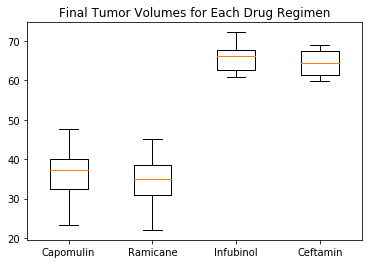

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Putting our previous data from the final timepoints into a list, which will give us the all boxplots in one graph
data_drug = [capo_num, rami_num, infu_num, ceft_num]
fig, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes for Each Drug Regimen')
ax1.boxplot(data_drug)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

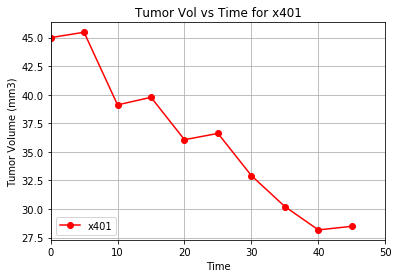

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_2 = new_df.groupby(new_df['Drug Regimen']) 
capo_3 = capo_2.get_group('Capomulin')
# Again simplifying the dataframe by only pulling out Mouse ID, Timepoint, and Tumor Vol
capo_line = capo_3[['Mouse ID','Timepoint', 'Tumor Volume (mm3)']]
# Picked a random one from this new df (I chose x401)
x_401 = capo_line.loc[capo_line['Mouse ID'].isin(['x401'])]
x_401['Tumor Volume (mm3)'].astype(int)
# Plot the line graph
plt.plot(x_401['Timepoint'], x_401['Tumor Volume (mm3)'], marker='o', color='red', label="x401")
plt.legend(loc="lower left")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Vol vs Time for x401")
plt.xlim(0, 50)
plt.grid()
plt.show()


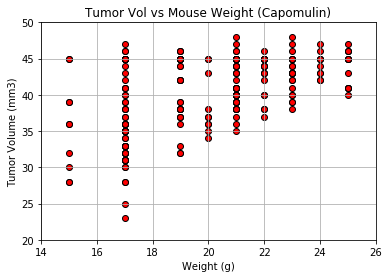

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Putting weight and tumor volume weight_cap and tum_cap and making sure they are integers so they play
# well with pearsonr further down.
weight_cap = capo_3['Weight (g)'].astype(int)
tum_cap = capo_3['Tumor Volume (mm3)'].astype(int)
plt.scatter(weight_cap, tum_cap, marker="o", facecolors="red", edgecolors="black")
plt.xlim(14,26)
plt.ylim(20,50)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Vol vs Mouse Weight (Capomulin)')
plt.grid()
plt.show()

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = (st.pearsonr(weight_cap,tum_cap))
print(f"The correlation coefficient between mouse weight and tumor volume is {round(correlation[0],2)}")


The correlation coefficient between mouse weight and tumor volume is 0.52


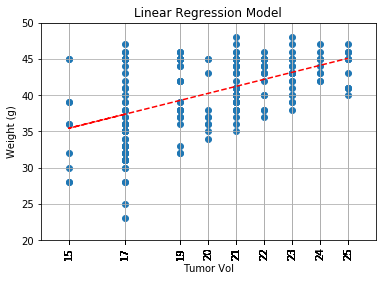

In [27]:
# Plotting the linear regression; taking the same data from above and putting linear regression over it.
# The difference in color was to help the line stand out 
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(weight_cap, tum_cap)
m_fit = m_slope * weight_cap + m_int
plt.scatter(weight_cap,tum_cap)
plt.plot(weight_cap,m_fit,"--", color='red')
plt.xticks(weight_cap, rotation=90)
plt.xlabel('Tumor Vol')
plt.ylabel('Weight (g)')
plt.title('Linear Regression Model')
plt.xlim(14,26)
plt.ylim(20,50)
plt.grid()
plt.show()